In [4]:
from modules import computenlttcepstro
import numpy as np
import os
import pickle as pk
import numpy as np
from scipy import signal
import pickle as pk
import os
from modules import computestaticresponse
try:
    import sportran as st
except ImportError:
    from sys import path
    path.append('..')
    import sportran as st
from sportran import md
import time

In [3]:
!cat modules/computenlttcepstro.py

import numpy as np
from scipy import signal
import pickle as pk
import os
from modules import computestaticresponse
try:
    import sportran as st
except ImportError:
    from sys import path
    path.append('..')
    import sportran as st
from sportran import md
import time


def autocorr(x):
    result = signal.correlate(x, x, mode='full', method='fft')
    v = [result[i] / (len(x) - abs(i - (len(x)) + 1)) for i in range(len(result))]
    return np.array(v[int(result.size / 2):])

def Ggeneratemod(nk):
    G = np.zeros((nk, 3))
    conta = 0
    i1 = 1
    i2 = 0
    i3 = 0
    G[0] = np.array([0, 0, 0])
    for i in range(1, nk):
        G[i] = np.array([i1, i2, i3])
        if G[i][0] != G[i][1] and G[i][1] == G[i][2]:
            i2 += 1
            if G[i][0] != G[i][1] and G[i][1] != G[i][2]:
                i3 += 1
        else:
            if G[i][1] != G[i][2]:
                i3 += 1
        if G[i][0] == G[i][1] and G[i][0] == G[i][2]:
            i1 += 1
            i2 = 0

In [5]:
jfile = st.i_o.TableFile('/scratch/endrigo/tip4p_2005/dump20fs/1current.out', group_vectors=True)



c_flux[1] c_flux[2] c_flux[3]
 #####################################
  all_ckeys =  [('flux', array([0, 1, 2]))]
 #####################################
Data length =  400001


In [6]:
jfile.read_datalines(start_step=0, NSTEPS=0, select_ckeys=['flux'])

  ckey =  [('flux', array([0, 1, 2]))]
    step =    100000 -  25.00% completed
    step =    200000 -  50.00% completed
    step =    300000 -  75.00% completed
    step =    400000 - 100.00% completed
  ( 400000 ) steps read.
DONE.  Elapsed time:  7.440572023391724 seconds


{'flux': array([[  1.44397223,   1.2938053 ,  14.30718071],
        [ -6.17866042,   8.07632185,  12.17998089],
        [ -9.06304301,   8.15465328,   8.84029866],
        ...,
        [  0.46337635,  -9.23075619, -15.05884704],
        [  7.81239359,  -9.29609785,  -9.26901342],
        [  9.46022345,  -6.12138339,  -1.81583081]])}

In [32]:
DT_FS = 0.5*10 #fs sono in unita' real!!

VOLUME=46.595655**3

TEMPERATURE=300

j = st.HeatCurrent([jfile.data['flux']], DT_FS=DT_FS,
                UNITS='real', VOLUME=VOLUME, TEMPERATURE=TEMPERATURE)


Using single component code.


In [35]:
fstar_THz = j.Nyquist_f_THz/12



jf = j.resample(fstar_THz=fstar_THz)


j.cepstral_analysis()


jf.cepstral_analysis()


j.compute_acf()

Using single component code.
-----------------------------------------------------
  RESAMPLE TIME SERIES
-----------------------------------------------------
 Original Nyquist freq  f_Ny =     100.00000 THz
 Resampling freq          f* =       8.33333 THz
 Sampling time         TSKIP =            12 steps
                             =        60.000 fs
 Original  n. of frequencies =        200001
 Resampled n. of frequencies =         16667
 min(PSD)          (pre-filter&sample) =      0.00322
 min(PSD)         (post-filter&sample) =     12.35954
 % of original PSD Power f<f* (pre-filter&sample)  = 11.215 %
 fPSD not calculated before resampling
 -----------------------------------------------------

-----------------------------------------------------
  CEPSTRAL ANALYSIS
-----------------------------------------------------
  AIC_Kmin  = 35  (P* = 36, corr_factor = 1.000000)
  L_0*   =           5.969317 +/-   0.011841
  S_0*   =         565.829104 +/-   6.699799
------------------

<IPython.core.display.Javascript object>


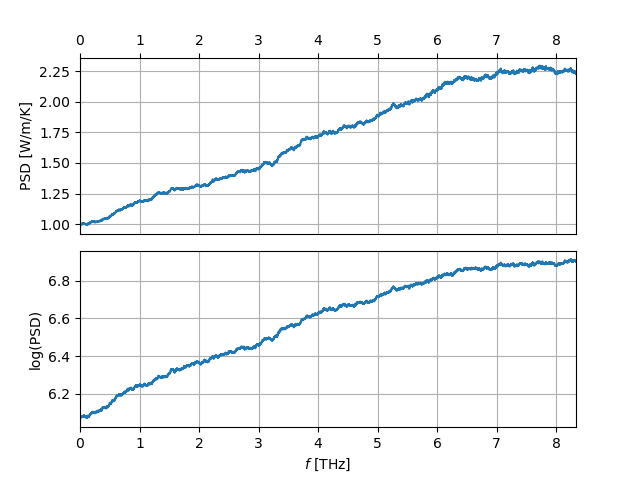

array([<AxesSubplot:ylabel='PSD [W/m/K]'>,
       <AxesSubplot:xlabel='$f$ [THz]', ylabel='log(PSD)'>], dtype=object)

In [36]:
%matplotlib notebook
jf.plot_periodogram(PSD_FILTER_W=0.5, kappa_units=True)